# SOC: Computational Geometry(Applications to image processing)

---
#### Advait Risbud
#### Department of Metallurgical Engineering and Materials Science, IIT Bombay
#### 2021

## Algorithms and their complexity

---

### Terminology 

1. The time needed to solve a problem expressed as a function of the size of the problem is called the *time complexity* of the problem, the limiting behaviour of which is called the *asymptotic time complexity*. The size is represented by an integer which is a measure of the quantity of input data. 
		
2. If a problem with input size $n$ can be solved in less than $cn^2$ time for some constant c then we say that the problem has time complexity $O(n^2)$ read as "of order $n^2$".
		
3. Solving a problem is interpreted in terms of the number of elementary operations(+, -, $\times$, /, comparing numbers or a branching instruction) which are those operations that have a constant asymptotic complexity, i.e. they can be completed in constant time.
		
4. Branching means when a programs moves from one sequence of instructions to another sequence. 
		
5. Inputs of same size may have different complexity for example, two arrays of integers of same size but one a little more jumbled than the other will imply different complexities for both. So we talk about the *worst case complexity* of algorithms such as sorting in the example earlier. 
		
6. The average complexity over all inputs of same size is called the *expected complexity*.

### Models of Computation
These are the rules that computers must follow. These models outline the operations that a computer can do and the cost(increase in complexity) associated with carrying them out. 
    
#### RAM(Random Access Machines)}
This model is for a one-accumulator computer. There are registers which can load, operate and store integers. All integers are assumed to be of "reasonable" size i.e. the total memory required is within the limits of the actual computer and that each integer is less than 1 word in size. Words are arbitrarily defined measures, say $w$ bits. The registers all have addresses. The allowed operations are:
    
1. arithmetic
2. input-output
3. indirect addressing
4. and branching instructions. 
    
With each operation there is a cost associated per the *uniform cost criterion* or the *logarithmic cost criterion*. Similar to this model there are others such as the Turing machine, SMM, counter machine etc. These are good or bad for complexity theory based on how well they allow the estimation of complexity.


## What are images?

---
Image processing is basically the backbone of instagram filters and photoshop. Images are stored as an array in which each element denotes a pixel or a voxel. When processing images using python the general flow goes as follows:
          
          
<div align="center">  Image read$\to$Low/high level processing$\to$Image writing or visualisation </div>
 	
The image is either written to memory or simply visualized but not stored. Images can be in many dimensions, ordinary images are in 2D but medical imaging involves 3D images and CT scans can even be 4D. 2D images are arrays of pixels and 3D images are arrays of voxels. \\
 	
### Storing images
#### Data Structures for storing images

Images are stored as arrays of pixels with a bit value assigned to each pixel denoting it's colour. When processing images using python, the arrays are stored as numpy arrays. 
 	
#### Content of an image
The accuracy of the colour depends on the bit-depth of the image. Most formats like JPEG, PNG etc. use 8-bit images i.e. the bit value for each pixel can lie in [0, $2^8-1$]=[0, 255]. Where 0 denotes black and 255 denotes white. One can see that with higher bit depth we can get sharper images similar to how millimeter marks on a foot rule allow us to measure length to a greater accuracy. Medical and microscopic images require higher accuracy so they are 16-bit. Their pixels/voxels have bit values in [0, 65535]. Images in negative with 16-bit will have bit values in [-32768, 32767]. More on negatives later. Note that medical images represent physical phenomena for eg: in CT scans bone is represented by a bit value$>$1000(more white). 
 	
#### Channels
Some images have even higher bit depth because their pixels have 3 dimensions themselves. For example, a colour image is a 3-D array each element of which is a 1-D array with 3 elements. 
 	
## Reading and writing images

---
Reading in an image means to equate some variable to the array which defines the image, however it is not the same as equating it to the array. The variable you assign the image to, can be displayed. However an array cannot be displayed as an image, it must be first converted to an image. If this confusing then the code should simpify things. 

(3456, 5184, 3)


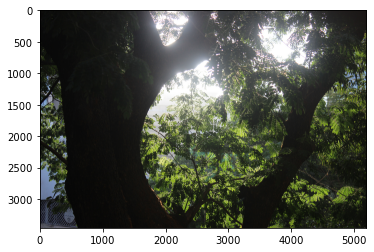

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
from PIL import Image
photo=img.imread('IMG_9200.JPG') 
plt.imshow(photo)
print(photo.shape) #Checks shape

## Image manipulation using numpy.

#### Making the negative.
The first and simplest manipulation would be to convert the image to it's negative. Negative as the name suggests is just the original image but all voxel/pixel(s) have values of the opposite sign. For this we will have to convert the array back to an image which can be done using the PIL library. Note that we can do all of this using OpenCV and PIL itself, however doing it from basics is better for understanding the algorithms behind the operation.
 

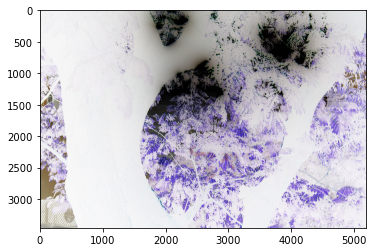

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
from PIL import Image
photo=img.imread('IMG_9200.JPG')   #Read in the image

np_photo=np.asarray(photo)

np_photo=np.negative(np_photo)#negates all the values in the array

negativeimg=Image.fromarray(np_photo)

negativeimg.save('Negative.png')

plt.imshow(negativeimg)






#### Converting to grayscale

Grayscale in pixel terms means an image which is a 2-D array. Which means that it is no longer made up of voxels but is made up of pixels. To make an RGB image to grayscale we need to take the R, G and B voxel values and add them in a way that we get just one channel. There is a standard formula for this conversion. $$Grayscale=0.2989\times R+0.5870\times G+0.1140\times B$$  The following program can be used to make the image to grayscale, we can also see the shape of the new image. 
 

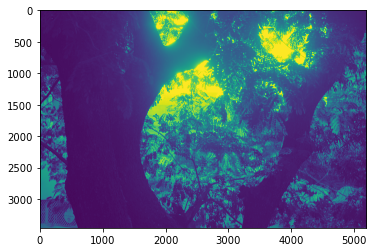

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
from PIL import Image
photo=img.imread('IMG_9200.JPG')   #Read in the image

np_photo=np.asarray(photo)

rgb_weights=[0.299, 0.587, 0.114]

grayscale_image = np.dot(np_photo[...,:3], rgb_weights)

grayscale=Image.fromarray(grayscale_image)
grayscale=grayscale.convert('L') #convert('RGB') would make a 24 bit image
                                 #that would occupy thrice the disk space

grayscale.save('grayscale.png')

plt.imshow(grayscale)






#### Cropping Images
Cropping basically involves trimming the array to whatever size we want. The array of the image in this program is 3456$\times$5184. We can crop it to include only the 2000$\times$2000 pixels from the top left by the following program.

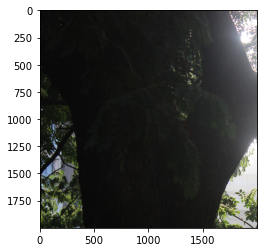

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
from PIL import Image
photo=img.imread('IMG_9200.JPG')   #Read in the image
np_photo=np.asarray(photo)

cropped_pic=np_photo[:2000, :2000]#slicing the array

cropped=Image.fromarray(cropped_pic)

cropped.save('cropped.png')

plt.imshow(cropped)

## Using OpenCV
#### Reading in and displaying images using OpenCV



In [2]:
import cv2
import numpy as np
import matplotlib as plt


img=cv2.imread('IMG_9200.JPG', cv2.IMREAD_COLOR) #Reads in the image, second paramter defines whether as colour or grayscale.


cv2.imshow("window", img) #Creates a window to show the image and shows the image from the second paramter.

cv2.waitKey(0)
cv2.destroyAllWindows()



#### Resizing images using OpenCV

Resizing means to directly scale the image. This means we have to use the same scale factor in both dimensions to increase or decrease the size. The function for this is cv2.resize() and it uses an interpolation algorithm. There are many kinds of interpolation algorihtms however the resize function can use any of the following:
1. Linear interpolation
2. Area interpolation
3. Cubic interpolation
4. Nearest-neighbor
5. Lanzcos resampling

Interpolation means to add values between two known values. In computational geometry terms if we know the values of some function __h__ at two points *p* and *q* in the set *S*, then interpolation algorithms can be used to find an approximate value of the function at a point other than *p* and *q*. In case of resizing we use interpolation to find the pixel value that should be assigned to new pixels added when increasing the size or to pixels to replace removed ones when size is to be reduced. 

- Nearest neighbor interpolation assigns the value of the nearest pixel in the source. This method can result in jagged edges.
- Bilinear interpolation as the name suggests involves 2 linear interpolations. 

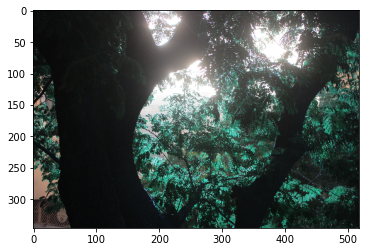

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img=cv2.imread('IMG_9200.JPG', cv2.IMREAD_COLOR) #Reads in the image, second paramter defines whether as colour or grayscale.

half=cv2.resize(img, (0, 0), fx=0.1, fy=0.1)

plt.imshow(half)
Half=cv2.imwrite("half.png", half)

As you can see the number of pixels in both directions have become 1/10th of the earlier number. The exact syntax for the resize function is shown in the image below <img src="resize_syntax.png"> 

As you can see the above image is huge, so let's shrink it using the following code

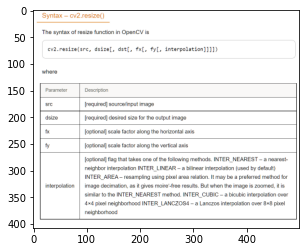

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img=cv2.imread("resize_syntax.png", cv2.IMREAD_COLOR)

half=cv2.resize(img, (0, 0), fx=0.5, fy=0.5)

plt.imshow(half)

syntax=cv2.imwrite("resize_new.png", half)

<img src="resize_new.png">

We can now see the output for all the different interpolations. Same image has been resized to a tenth of the number of voxels but using different algorithms.

Linear
Area
Cubic


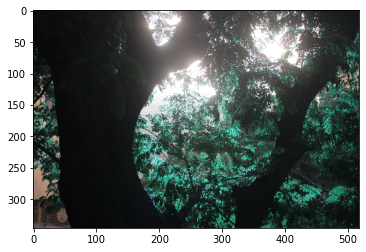

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img=cv2.imread('IMG_9200.JPG', cv2.IMREAD_COLOR) #Reads in the image, second paramter defines whether as colour or grayscale.

half=cv2.resize(img, (0, 0), fx=0.1, fy=0.1, interpolation= cv2.INTER_LINEAR)
half1=cv2.resize(img, (0, 0), fx=0.1, fy=0.1, interpolation= cv2.INTER_AREA)
half2=cv2.resize(img, (0, 0), fx=0.1, fy=0.1, interpolation= cv2.INTER_CUBIC)
half3=cv2.resize(img, (0, 0), fx=0.1, fy=0.1, interpolation= cv2.INTER_NEAREST)


Titles=["Linear", "Area", "Cubic", "Nearest", "Lanzcos"]
Images=[half, half1, half2, half3]
n=3
Half=cv2.imwrite("first.png", half)
Half1=cv2.imwrite("second.png", half1)
Half2=cv2.imwrite("third.png", half2)
Half3=cv2.imwrite("fourth.png", half3)

for i in range(n):
    print(Titles[i])
    plt.imshow(Images[i])

#### Grayscaling
Grayscaling is easy in OpenCV, we just have to read the image as grayscale. The algorithm for this conversion is same as [grayscaling with numpy](#grayscale). The time complexity of this algorithm is $O(mn)$ for an image with m$\times$n voxels.

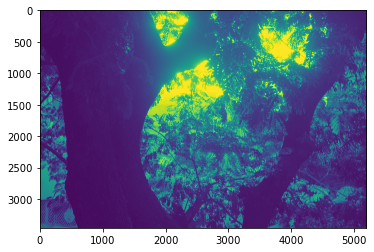

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img=cv2.imread('IMG_9200.JPG')
 
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_img)

Rotating the image is done by simply transposing the array as desired.  

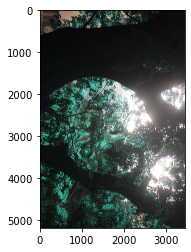

In [12]:
import matplotlib.pyplot as plt
import cv2
photo=cv2.imread('IMG_9200.JPG')   #Read in the image

photorotate=cv2.rotate(photo, cv2.cv2.ROTATE_90_CLOCKWISE)

plt.imshow(photorotate)



#### Histogram Analysis 
We can generate a histogram of number of pixels for each intensity value. This histrogram can be generated for each channel in case of a colour image or for the grayscale channel. The peaks tells us where the intensity is high. 

##### Bimodal Images
A normal distribution corresponds to a bell shaped curve. Whereas a bimodal distribution corresponds to a distribution with 2 peaks. 

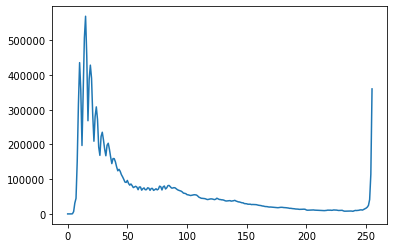

In [12]:
import cv2
import matplotlib.pyplot as plt
photo=cv2.imread('IMG_9200.JPG')
photogray=cv2.cvtColor(photo, cv2.COLOR_BGR2GRAY)

histr = cv2.calcHist([photogray],[0],None,[256],[0, 256])

plt.plot(histr)

#### Image Segmentation
Image segmentation is a commonly used technique in digital image processing and analysis to partition an image into multiple parts or regions, often based on the characteristics of the pixels in the image. Image segmentation could involve separating foreground from background, or clustering regions of pixels based on similarities in color or shape. For example, a common application of image segmentation in medical imaging is to detect and label pixels in an image or voxels of a 3D volume that represent a tumor in a patient’s brain or other organs. The thresholding is done to grayscale images. 

1. Simple binary thresholding involves setting a threshold value and turning all pixels having intensities below that to zero and all those above threshold to max(255). Below is an example on simple thresholding. 

2. Inverse binary thresholding as the name suggests is the opposite of (1). All pixels with GRAYSCALE value greater than the threshold are set to zero and those less than threshold are set to max.

3. In truncate thresholding the destination pixel is set to the threshold (thresh), if the source pixel value is greater than the threshold. Otherwise, it is set to the source pixel value.

4. In threshold to zer: the destination pixel value is set to the pixel value of the corresponding source , if the source pixel value is greater than the threshold. Otherwise, it is set to zero.

5. In inverse thresholding to zero the opposite of 5 is performed.

##### Otsu Thresholding
This is another method to separate the foreground from the background in images. It differs from the others as here we don't set a specific threshold value but it is picked automatically based on statistical methods. The average time complexity for this algorithm is $O(MN)$ where N is the number of pixels and M is the bit depth eg. 256. 


Text(0.5, 1.0, 'Otsu Thresholding')

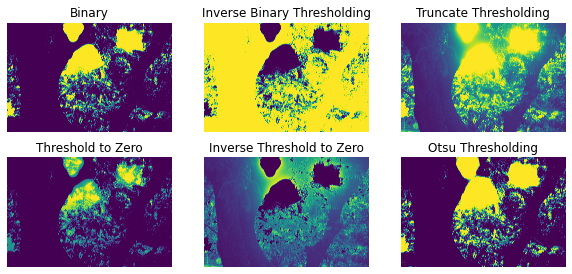

In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


img=cv2.imread('IMG_9200.JPG')

photo = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thresh1 = cv2.threshold(photo, 120, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(photo, 120, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(photo, 120, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(photo, 120, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(photo, 120, 255, cv2.THRESH_TOZERO_INV)
ret, thresh6 = cv2.threshold(photo, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)  
fig = plt.figure(figsize=(10, 7))

rows = 3
columns = 3

cv2.imwrite("thresh1.png", thresh1)
cv2.imwrite("thresh2.png", thresh2)
cv2.imwrite("thresh3.png", thresh3)
cv2.imwrite("thresh4.png", thresh4)
cv2.imwrite("thresh5.png", thresh5)
cv2.imwrite("thresh6.png", thresh6)

fig.add_subplot(rows, columns, 1)
plt.imshow(thresh1)
plt.axis('off')
plt.title("Binary")

fig.add_subplot(rows, columns, 2)
plt.imshow(thresh2)
plt.axis('off')
plt.title("Inverse Binary Thresholding")

fig.add_subplot(rows, columns, 3)
plt.imshow(thresh3) 
plt.axis('off')
plt.title("Truncate Thresholding")

fig.add_subplot(rows, columns, 4)
plt.imshow(thresh4) 
plt.axis('off')
plt.title("Threshold to Zero")

fig.add_subplot(rows, columns, 5)
plt.imshow(thresh5)
plt.axis('off')
plt.title("Inverse Threshold to Zero")

fig.add_subplot(rows, columns, 6)
plt.imshow(thresh6)
plt.axis('off')
plt.title("Otsu Thresholding")

#### Image filters
In image processing we often have to get rid of some aspects of an image. So akin to using a sieve we use filters or masks to remove unwanted things in images. Filters are of 2 types, linear and non-linear. Linear ones include mean, Laplacian and Laplacian of Gaussian. Non-linear filters include median, maximum, minimum, Sobel, Prewitt and Canny filters. 

The filter is a matrix which is passed over all pixels to calculate a final value for that pixel post filtering. If we consider a $3\times3$ matrix as our filter then the center of the filter is placed on pixel (i, j) and a sub image of the same size as the filter is considered around the main pixel. What are the contents of the filtering matrix? They are numbers called coefficients. These values depend on the type of filtering being performed. Each element in the sub image is multiplied by the corresponding element in the filter, this again gives us a $3\times3$ matrix. A final value for the pixel (i, j) is calculated using a mathematical expression. 

A natural question here is what about pixels at the boundaries? A process called padding is done there. 

##### Edge Detection
There are three steps in detecting edges:
1. Noise reduction. Supressing noise without removing edges.
2. Edge enhancement(high pass filter). Highlighting the edges and weakening elsewhere. 
3. Edge localisation. Look at maxima from high pass filter.

Sobel filter is used for edge detection. It is a first derivative filter. The orientation and intensity of the edge is given by the magnitude and direction of the gradient. The gradient is calculated after performing convolution with the kernel on the sub image. First a horizontal edge detection is performed following which a vertical one is done or vice versa. The two images are stitched to get a final image containing only the edges. When the Sobel kernel is applied on a region of constant intensity the output is a zero vector. Below example illustrates the Sobel filter using OpenCV and scipy.

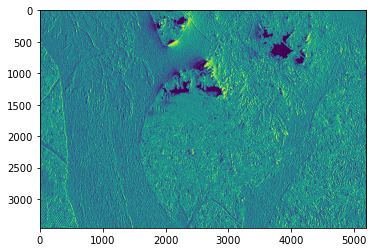

In [7]:
import cv2 
from scipy import ndimage

photo=cv2.imread('IMG_9200.JPG')
photogray=cv2.cvtColor(photo, cv2.COLOR_BGR2GRAY)
sobel=ndimage.sobel(photogray)

cv2.imwrite("Sobel.png", sobel)
plt.imshow(sobel)

Another kind of filter is the __Canny Filter__. The Canny edge filter involves:
1. Gaussian filter is applied for smoothening.
2. Gradients at each point and their direction is calculated. 
3. At an edge the first derivative will either have a maxima or a minima(zero crossing). However the magnitude of the gradient will be maximum. These pixels are called ridge pixels. All except the ridge pixels are assigned a value of zero. This is known as *non maximal supression*. 
4. The ridge pixels are thresholded using two thresholds. The ones having value greater than the max are called strong edge pixels and the others are called weak edge pixels. 
5. All weak pixels that are 8 connected to strong pixels are retained and rest are set to zero.

__Gaussian Filter__:
This filter is used for smoothening an image by removing obvious noise. The kernel for a $(2k+1)\times(2k+1)$ filter is
$$H_{ij}=\frac{1}{2\pi \sigma^2}exp\Bigg(-\dfrac{(i-(k+1))^2+(j-(k+1))^2}{2\sigma^2}\Bigg);1\leq i, j\leq(2k+1)$$

Using this, below is an example of Canny edge detection.

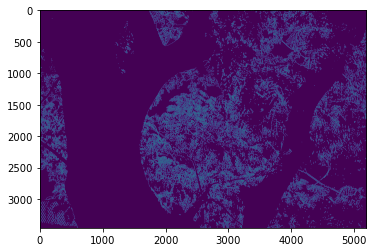

In [15]:
import cv2
import matplotlib.pyplot as plt
photo=cv2.imread('IMG_9200.JPG')
canned=cv2.Canny(photo, 100, 200)
cv2.imwrite("Canny.png", canned)
plt.imshow(canned)

#### Point Cloud Generation
##### What are point clouds?
Point clouds are collections of data points in space  which are used to represent 3-D objects. Any solid object can be represented as the collection of points. However for 3-D visualisation we need solid objects and not point clouds. This is where we perform surface reconstruction. Point clouds are stored as arrays of 3-tuples where each element of the tuple is an xyz co-ordinate.

We take N points from the surface of the shape to make the point cloud. How large should we choose N? 
1. Should we take one common huge number for all 3-D objetcs? No. Because size may differ hence we could lose detail in case of larger objects. 

2. Should it depend on the scale of the object i.e. more points for larger objects of the same shape? Yes.

3. Should it depend on the complexity? Yes. More points for elucidating more detailed features. 

__How do we classify this complexity?__ 

The Nyquist-Shannon Sampling theorem is useful here. More detail implies higher frequency in the image.




# Bibliography

1. [Parsania, Pankaj & Virparia, P.. (2018). Computational Time Complexity of Image Interpolation Algorithms. International Journal of Computer Sciences and Engineering. 6. 491-496. 10.26438/ijcse/v6i7.491496.](https://www.researchgate.net/publication/327073588_Computational_Time_Complexity_of_Image_Interpolation_Algorithms) 

2. [Distance weighted averaging for bilinear interpolation](https://encyclopediaofmath.org/wiki/Distance-weighted_mean)

3. Geeks for Geeks and w3schools.

4. [Computational Foundations of Image Interpolation Algorithms](https://citeseerx.ist.psu.edu/viewdoc/download? 
doi=10.1.1.122.2248&rep=rep1&type=pdf)

5. [Image Processing and Acquisition using Python](https://www.amazon.in/Image-Processing-Acquisition-Python-Chapman/dp/0367198088)